# HW 1 Part 2: Preprocessing Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided bank marketing dataset (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [274]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./bank-hw1.csv', header=None, na_values="?")

[LP 1] Deal with the erroneous values in the dataset. 
[LP 2] Deal with the missing values in the dataset. 

Below is necessary information about the columns that contain missing and erroneous values:

1. Age: must be in the range 18-100 
2. Job: case insensitive field, column contains clerical errors where extra dots or punctuations are left in the entries 
3. Marital: marital status is case insensitive; short forms of the entries refer to the same value (e.g., div is the same as divorced); there are typographical errors in the entries
4. Day and month: some entries have both these values combined in one column 
5. Duration: all entries must be non-negative

The set of possible values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices even if you only took a guess. 



In [275]:
df.info()


"""
17 attributes, the last is an output as explained in names text file. 
2252 instances for each attribute.
Dtype for all attributes is object or categorical types. 
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2252 non-null   object
 1   1       2248 non-null   object
 2   2       2252 non-null   object
 3   3       2143 non-null   object
 4   4       2252 non-null   object
 5   5       2252 non-null   object
 6   6       2252 non-null   object
 7   7       2252 non-null   object
 8   8       2252 non-null   object
 9   9       2249 non-null   object
 10  10      2250 non-null   object
 11  11      2247 non-null   object
 12  12      2250 non-null   object
 13  13      2249 non-null   object
 14  14      2252 non-null   object
 15  15      2163 non-null   object
 16  16      2252 non-null   object
dtypes: object(17)
memory usage: 299.2+ KB


'\n17 attributes, the last is an output as explained in names text file. \n2252 instances for each attribute.\nDtype for all attributes is object or categorical types. \n'

In [276]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,47,management,married,tertiary,no,-315,yes,yes,cellular,27,aug,112,9,-1,0,unknown,no
2,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179,16,-1,0,unknown,no
3,25,student,single,secondary,no,154,no,no,cellular,2,sep,382,1,183,3,success,yes
4,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,feb,23,5,-1,0,unknown,no



column 0 - age is numeric

column 4 - default means if a person has credit in default

column 5 - balance shows average annual balance (should be numeric)

column 6 - housing loan

column 7 - personal loan

column 9 - last contact day of the month (numeric)

column 10 - last contact month of the year

column 11 - duration of last contact in seconds (numeric)

column 12 - number of contacts performed during current campaign and for this client (numeric)

column 13 - pdays is number of days that passed by since a client was contacted from a previous campaign, -1 means no contact (numeric)

column 14 - previous means number of contacts performed before this campaign for this client (numeric)

column 15 - poutcome is outcome of the previous marketing campaign

column 16 - the outcome of campaign, has the client subscribed for a term deposit? 


In [277]:
#don't want to use the labels for the columns to preprocess data, removing first row from all columns
df = df.iloc[1:,:]

In [278]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,47,management,married,tertiary,no,-315,yes,yes,cellular,27,aug,112,9,-1,0,unknown,no
2,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179,16,-1,0,unknown,no
3,25,student,single,secondary,no,154,no,no,cellular,2,sep,382,1,183,3,success,yes
4,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,feb,23,5,-1,0,unknown,no
5,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no


In [279]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
dtype: object

In [280]:
# need to make sure columns that are numeric as described in names file are converted to numeric first
#df[0] = pd.to_numeric(df[0])
#only column unable to convert is 9 = days, has erroneous values
df[[0,5,11,12,13,14]]=df[[0,5,11,12,13,14]].apply(pd.to_numeric)

In [281]:
df.dtypes

0       int64
1      object
2      object
3      object
4      object
5       int64
6      object
7      object
8      object
9      object
10     object
11    float64
12    float64
13    float64
14      int64
15     object
16     object
dtype: object

In [282]:
df[0].value_counts()

31     103
34      97
35      94
32      93
33      91
      ... 
127      1
67       1
228      1
255      1
295      1
Name: 0, Length: 67, dtype: int64

In [283]:
df[0].describe()

count    2251.000000
mean       41.395824
std        13.474722
min         2.000000
25%        33.000000
50%        39.000000
75%        49.000000
max       295.000000
Name: 0, dtype: float64

In [284]:

range = 18
col = df[0]

count = col[col < range].count()
print(count)

1


In [301]:
range = 100
col = df[0]

count = col[col > range].count()
print(count)

4


In [313]:
df[0] = df[0].replace({127,228,255,295}, 41)

In [314]:
count = (df[0] > 100).sum()
print(count)

0


(array([  1.,   0.,  59., 583., 624., 448., 361., 140.,  17.,  18.]),
 array([ 2. ,  9.9, 17.8, 25.7, 33.6, 41.5, 49.4, 57.3, 65.2, 73.1, 81. ]),
 <BarContainer object of 10 artists>)

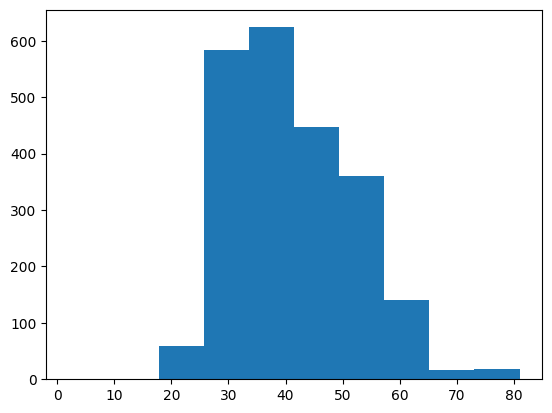

In [318]:
plt.hist(df[0])

In [287]:
df[0] > 100

1       False
2       False
3       False
4       False
5       False
        ...  
2247    False
2248    False
2249    False
2250    False
2251    False
Name: 0, Length: 2251, dtype: bool

The histogram shows all values are below age 100, but unable to see range for 18 as I did not use bins. However, checking to see if the age column has any values below age of 18 returns false. Therefore, all values for this column are within the range of 18 to 100. 

In [288]:
#Get rid of unwanted punctuation in Job column 
df[1] = df[1].str.replace('[^\w\s]+', '', regex=True)

In [289]:
df[1].str.contains('[^\w\s]+').any()

False

Replaced all punctuation marks from all job description values in job column using regex string replace. Checked to see if any string in the column still contains a special character, returned False. 

In [290]:
df[1].head(20)

1       management
2       management
3          student
4        housemaid
5       bluecollar
6       bluecollar
7       management
8       technician
9            admin
10      bluecollar
11      management
12      unemployed
13      bluecollar
14    entrepreneur
15      management
16      technician
17      bluecollar
18      bluecollar
19      technician
20           admin
Name: 1, dtype: object

In [291]:
df[1].value_counts()

management      465
bluecollar      463
technician      383
admin           273
services        197
retired         111
entrepreneur     81
selfemployed     77
housemaid        64
student          57
unemployed       57
unknown          18
None              1
Name: 1, dtype: int64

In [292]:
df[2].value_counts()

married     1350
single       635
divorced     243
div            5
M              4
Single         4
1              3
Div            2
Married        2
maried         1
mairied        1
marirred       1
Name: 2, dtype: int64

In [293]:
#Get rid of typos in marital column, check with value counts of typos that exists and replace them with correct categories. 
df[2] = df[2].replace({'div':'divorced','M':'married', 'Single':'single','Div':'divorced','Married':'married', 'maried':'married','mairied':'married', 'marirred':'married'})

In [294]:
df[2].value_counts()

married     1359
single       639
divorced     250
1              3
Name: 2, dtype: int64

In [295]:
## Your code for LP 2 goes here.

< Your explanation for LP 1 goes here >

< Your explanation for LP 2 goes here >

[LP 3] Use encoders and convert the categorical variables to numerical values.

In [296]:
## Your code for LP 3 goes here. 

[HP 1] Describe your choices to preprocess these columns and explain why they are appropriate for the column.

< Your answer for HP 1 goes here >

[LP 4] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.

In [297]:
## Your code for LP 4 goes here. 

Save your clean dataset in a file called **bank_clean.csv**. Submit this file along with the ipynb solution file. 

In [298]:
## Your code to save the dataframe to a csv file goes here. 

[HP 2] What is the average duration of calls made in the month of November? Plot a histogram of call duration in the month of November.

In [299]:
## Your code for HP 2 goes here. 

[HP 3] How many times on an average were customers whose "poutcome" was "success" contacted previously ("previous" column contains this information)? How does this compare to the customers whose "poutcome" was "failure" or "other"? What insight does this step provide for the business objective of having a successful campaign? 

In [300]:
## Your code for HP 3 goes here. 

# References
Include ALL your references here. 

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The bank_clean.csv file

